In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Tmap data

In [8]:
tmap_day14 = pd.read_csv('/Users/jeenskki/Documents/bigdata2020/data/day14/day14-all.csv')

In [9]:
tmap_day14.isna().sum()

tour_id              0
congestion_1         0
congestion_2         0
congestion_3         0
congestion_4         0
congestion_avg       0
congestion_max       0
road_total           0
measured_at       1055
dtype: int64

In [10]:
tmap_day14.head()

,tour_id,congestion_1,congestion_2,congestion_3,congestion_4,congestion_avg,congestion_max,road_total,measured_at
0,1,21,30,44,9,2.3942,3,104,2020/10/14 14:02
1,2,26,41,53,14,2.4104,3,134,2020/10/14 14:02
2,3,12,5,1,0,1.3889,1,18,2020/10/14 14:02
3,4,15,32,89,22,2.7468,3,158,2020/10/14 14:02
4,5,46,43,54,10,2.1830,3,153,2020/10/14 14:02


In [11]:
tmap_day14['measured_at'] = '2020/10/14 14:00'

In [12]:
tmap_day14.head()

,tour_id,congestion_1,congestion_2,congestion_3,congestion_4,congestion_avg,congestion_max,road_total,measured_at
0,1,21,30,44,9,2.3942,3,104,2020/10/14 14:00
1,2,26,41,53,14,2.4104,3,134,2020/10/14 14:00
2,3,12,5,1,0,1.3889,1,18,2020/10/14 14:00
3,4,15,32,89,22,2.7468,3,158,2020/10/14 14:00
4,5,46,43,54,10,2.1830,3,153,2020/10/14 14:00


In [13]:
tmap_day14.shape

(11000, 9)

In [14]:
from scipy.stats import shapiro

shapiro(tmap_day14["congestion_avg"])

/Users/jeenskki/Library/Python/3.7/lib/python/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9255520701408386, pvalue=0.0)

In [23]:
 tmap_day14_ = tmap_day14[['tour_id', 'congestion_avg', 'measured_at']]

### tour_data

In [196]:
tour_data = pd.read_csv('/Users/jeenskki/Documents/bigdata2020/data/tour_data.csv')

In [197]:
tour_data.head()

,tour_id,title,cat1,cat2,cat3,areacode,addr1,tel,mapx,mapy,firstimage,firstimage2,contentid,contenttypeid,readcount,sigungucode,zipcode
0,1,㈜코스테이,B02,B0201,B02010900,1,서울특별시 강서구 곰달래로 247,02-2643-8800,126.860538,37.532234,http://tong.visitkorea.or.kr/cms/resource/22/1...,http://tong.visitkorea.or.kr/cms/resource/22/1...,1747824,32,16412.0,4.0,07741
1,2,㈜피에프비파트너스 마린칸토,A05,A0502,A05020300,1,서울특별시 용산구 청파로 74,02-712-5005,126.957507,37.535694,http://tong.visitkorea.or.kr/cms/resource/19/2...,http://tong.visitkorea.or.kr/cms/resource/19/2...,2598695,39,39.0,21.0,04372
2,3,가나아트센터,A02,A0206,A02060500,1,서울특별시 종로구 평창30길 28,NaN,126.975181,37.612210,http://tong.visitkorea.or.kr/cms/resource/19/1...,http://tong.visitkorea.or.kr/cms/resource/19/1...,129854,14,41050.0,23.0,03004
3,4,가나안경원 (명동2호점),A04,A0401,A04010600,1,서울특별시 중구 명동8가길 33,NaN,126.986934,37.561960,http://tong.visitkorea.or.kr/cms/resource/71/2...,http://tong.visitkorea.or.kr/cms/resource/71/2...,984586,38,11157.0,24.0,04537
4,5,가든파이브 (Garden5),A04,A0401,A04010600,1,서울특별시 송파구 충민로 66,NaN,127.122935,37.477006,http://tong.visitkorea.or.kr/cms/resource/78/1...,http://tong.visitkorea.or.kr/cms/resource/78/1...,732484,38,16603.0,18.0,05838


### 데이터 합치기

In [219]:
tour_tmap = pd.merge(tour_data, tmap_day14_, how='left', left_on='tour_id', right_on='tour_id')

In [220]:
# 데이터 절반
tour_tmap_half = tour_tmap.iloc[:11000,:]

In [200]:
tour_tmap_half.head()

,tour_id,title,cat1,cat2,cat3,areacode,addr1,tel,mapx,mapy,firstimage,firstimage2,contentid,contenttypeid,readcount,sigungucode,zipcode,congestion_avg,measured_at
0,1,㈜코스테이,B02,B0201,B02010900,1,서울특별시 강서구 곰달래로 247,02-2643-8800,126.860538,37.532234,http://tong.visitkorea.or.kr/cms/resource/22/1...,http://tong.visitkorea.or.kr/cms/resource/22/1...,1747824,32,16412.0,4.0,07741,2.3942,2020/10/14 14:00
1,2,㈜피에프비파트너스 마린칸토,A05,A0502,A05020300,1,서울특별시 용산구 청파로 74,02-712-5005,126.957507,37.535694,http://tong.visitkorea.or.kr/cms/resource/19/2...,http://tong.visitkorea.or.kr/cms/resource/19/2...,2598695,39,39.0,21.0,04372,2.4104,2020/10/14 14:00
2,3,가나아트센터,A02,A0206,A02060500,1,서울특별시 종로구 평창30길 28,NaN,126.975181,37.612210,http://tong.visitkorea.or.kr/cms/resource/19/1...,http://tong.visitkorea.or.kr/cms/resource/19/1...,129854,14,41050.0,23.0,03004,1.3889,2020/10/14 14:00
3,4,가나안경원 (명동2호점),A04,A0401,A04010600,1,서울특별시 중구 명동8가길 33,NaN,126.986934,37.561960,http://tong.visitkorea.or.kr/cms/resource/71/2...,http://tong.visitkorea.or.kr/cms/resource/71/2...,984586,38,11157.0,24.0,04537,2.7468,2020/10/14 14:00
4,5,가든파이브 (Garden5),A04,A0401,A04010600,1,서울특별시 송파구 충민로 66,NaN,127.122935,37.477006,http://tong.visitkorea.or.kr/cms/resource/78/1...,http://tong.visitkorea.or.kr/cms/resource/78/1...,732484,38,16603.0,18.0,05838,2.1830,2020/10/14 14:00


In [27]:
tour_tmap_half.shape

(11000, 19)

In [28]:
tour_tmap_half.isna().sum()

tour_id              0
title                0
cat1                 0
cat2                 0
cat3                 0
areacode             0
addr1                0
tel               5173
mapx                 0
mapy                 0
firstimage        3251
firstimage2       3251
contentid            0
contenttypeid        0
readcount           28
sigungucode          0
zipcode            161
congestion_avg       0
measured_at          0
dtype: int64

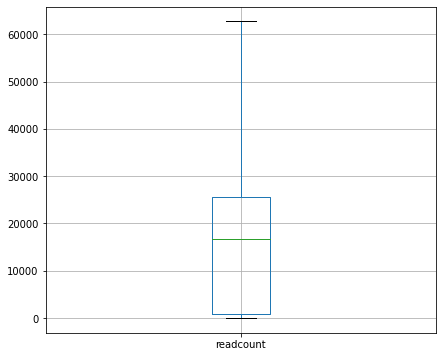

In [223]:
plt.figure(figsize=(7, 6))
boxplot = tour_tmap_half.boxplot(column=["readcount"], showfliers= False)

## 데이터 모델링

In [29]:
from haversine import haversine
from sklearn.preprocessing import MinMaxScaler

In [221]:
# 가중치 (값 선정 중요할듯)
weight_dist = 0.8
weight_rc = 0.15
weight_conavg = 0.05

In [224]:
# outlier 제외 max값 산출
iqr = tour_tmap_half["readcount"].quantile(.75) - tour_tmap_half["readcount"].quantile(.25)

uf = tour_tmap_half["readcount"].quantile(.75) + (1.5 * iqr)

uf

62831.375

In [225]:
# cur_location = (37.4798, 126.8828) # 우림라이온스빌딩B동
# cur_location = (36.3323303,127.4320223) # 대전역
cur_location = (37.3947464,127.1090181) # 판교역

# outlier 보정
for i in range(len(tour_tmap_half)):
    if tour_tmap_half.iloc[i, tour_tmap_half.columns.get_loc("readcount")] > uf:
        tour_tmap_half.iloc[i, tour_tmap_half.columns.get_loc("readcount")] = 100000

# gps 좌표로 거리(km) 계산
tour_tmap_half['dist'] = tour_tmap_half.apply(lambda x: haversine(cur_location, (x['mapy'], x['mapx'])), axis=1)

# 0~1 사이 값으로 scaling
scaler = MinMaxScaler()
tour_tmap_half[['dist_scaled', 'readcount_scaled', 'con_avg_scaled']] = \
    scaler.fit_transform(tour_tmap_half[['dist', 'readcount', 'congestion_avg']])

# weight 계산
tour_tmap_half['dist_scaled'] = weight_dist * (1 - tour_tmap_half['dist_scaled'])
tour_tmap_half['readcount_scaled'] = weight_rc * tour_tmap_half['readcount_scaled']
tour_tmap_half['con_avg_scaled'] = weight_conavg * tour_tmap_half['con_avg_scaled']

# feature 합산
tour_tmap_half['rank'] = tour_tmap_half['dist_scaled'] + tour_tmap_half['readcount_scaled'] + tour_tmap_half['con_avg_scaled']

/Users/jeenskki/Library/Python/3.7/lib/python/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/jeenskki/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/jeenskki/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [226]:
tour_tmap_half.sort_values(by=['rank'], ascending=False).head(20)

,tour_id,title,cat1,cat2,cat3,areacode,addr1,tel,mapx,mapy,...,readcount,sigungucode,zipcode,congestion_avg,measured_at,dist,dist_scaled,readcount_scaled,con_avg_scaled,rank
7139,7140,율동공원,A02,A0202,A02020700,31,경기도 성남시 분당구 문정로 145,NaN,127.150450,37.380304,...,100000.0,12.0,13576,2.1500,2020/10/14 14:00,3.997241,0.790726,0.15,0.026875,0.967601
2501,2502,The-K호텔서울 (더케이호텔서울),B02,B0201,B02010100,1,서울특별시 서초구 바우뫼로12길 70,02-571-8100,127.033058,37.468261,...,100000.0,15.0,06769,2.4435,2020/10/14 14:00,10.573914,0.774026,0.15,0.030544,0.954570
1953,1954,청계산,A01,A0101,A01010400,1,서울특별시 서초구 원터길,NaN,127.054368,37.441687,...,100000.0,15.0,06806,1.6250,2020/10/14 14:00,7.108971,0.782824,0.15,0.020313,0.953137
1522,1523,예술의전당 한가람미술관,A02,A0206,A02060500,1,서울특별시 서초구 남부순환로 2406,NaN,127.013770,37.479309,...,100000.0,15.0,06757,2.3158,2020/10/14 14:00,12.614949,0.768843,0.15,0.028948,0.947791
613,614,롯데월드,A02,A0202,A02020600,1,서울특별시 송파구 올림픽로 240,NaN,127.097901,37.511352,...,100000.0,18.0,05554,2.3629,2020/10/14 14:00,13.003021,0.767858,0.15,0.029536,0.947394
2078,2079,키자니아 서울,A02,A0203,A02030400,1,서울특별시 송파구 올림픽로 240,NaN,127.098139,37.511068,...,100000.0,18.0,05554,2.3438,2020/10/14 14:00,12.970032,0.767942,0.15,0.029298,0.947239
1236,1237,송파나루공원(석촌호수),A02,A0202,A02020700,1,서울특별시 송파구 삼학사로 136,NaN,127.097973,37.509571,...,100000.0,18.0,05608,2.2975,2020/10/14 14:00,12.805142,0.768360,0.15,0.028719,0.947079
2055,2056,코엑스 아쿠아리움,A02,A0206,A02060300,1,서울특별시 강남구 영동대로 513,NaN,127.059132,37.511809,...,100000.0,1.0,06164,2.4496,2020/10/14 14:00,13.741501,0.765983,0.15,0.030620,0.946603
2022,2023,카카오프렌즈 브랜드스토어,A04,A0401,A04010600,1,서울특별시 강남구 영동대로 513,NaN,127.058757,37.512690,...,100000.0,1.0,06164,2.4344,2020/10/14 14:00,13.844838,0.765720,0.15,0.030430,0.946150
6642,6643,수원 화성 [유네스코 세계문화유산],A02,A0201,A02010200,31,경기도 수원시 장안구 수성로 320,NaN,127.007287,37.291856,...,100000.0,13.0,16273,2.5747,2020/10/14 14:00,14.552372,0.763924,0.15,0.032184,0.946108
